In [1]:
#-------------------- Import Packages --------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

#-------------------- Import Own Modules --------------------#
from teq_planet import getTeqpl, getTeqpl_error
from format_dataset import add_star_luminosity_dataset

In [2]:
#-------------------- Load Data --------------------#
dataset = pd.read_csv('Filtered_dataset.csv')
dataset

,# name,mass,semi_major_axis,temp_eq,star_luminosity,star_radius,star_teff,star_mass,radius,star_age,orbital_period
0,51 Peg b,149.379351,0.052000,1378.334390,1.620586,1.266,5793.0,1.110,21.297063,4.000,4.230800
1,55 Cnc e,8.590902,0.015439,1996.404187,0.628520,0.980,5196.0,1.015,1.947000,10.200,0.736548
2,AF Lep b,1620.924874,8.400000,117.641346,1.980854,1.250,6130.0,1.200,14.907944,0.024,8935.000000
3,AU Mic b,36.868095,0.083050,536.171411,0.094650,0.750,3700.0,0.500,5.123625,0.022,8.463035
4,AU Mic c,32.100669,0.141700,410.654431,0.094650,0.750,3700.0,0.500,3.138515,0.022,18.859014
...,...,...,...,...,...,...,...,...,...,...,...
470,XO-4 b,513.610705,0.054850,1461.119331,2.276949,1.550,5700.0,1.320,14.762228,2.100,4.124730
471,XO-6 b,603.873973,0.081500,1576.893711,6.819966,1.930,6720.0,1.470,23.202590,1.880,3.765001
472,XO-7 b,225.340340,0.044210,1744.063777,3.000779,1.480,6250.0,1.405,15.389931,1.180,2.864142
473,kappa And b,4131.769286,100.000000,89.879687,78.438221,2.290,11361.0,2.800,13.450777,0.047,215000.000000


## Plot Radius vs Mass and Orbital Period

<IPython.core.display.Javascript object>


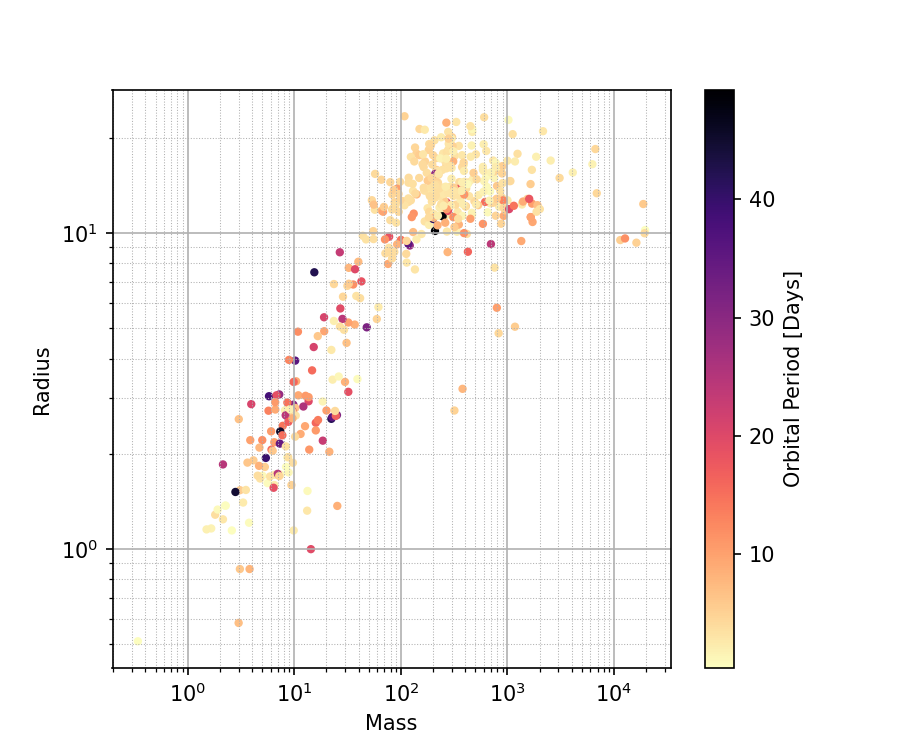

In [3]:
long_per = dataset[dataset.orbital_period >= 50.]
dataset_per = dataset.drop(long_per.index, axis=0)

fig, ax = plt.subplots(figsize=(6,5),dpi=150)

c = ax.scatter(dataset_per['mass'],dataset_per['radius'], c=dataset_per['orbital_period'], cmap=cm.magma_r, marker='.', alpha=1)
plt.colorbar(c, label=r'Orbital Period [Days]')

# ax.legend(fontsize=8, bbox_to_anchor=(1.2, 1), loc="upper left")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Mass')
ax.set_ylabel(r'Radius')

ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)
ax.minorticks_on()

## Plot Radius vs Mass and Teq

<IPython.core.display.Javascript object>


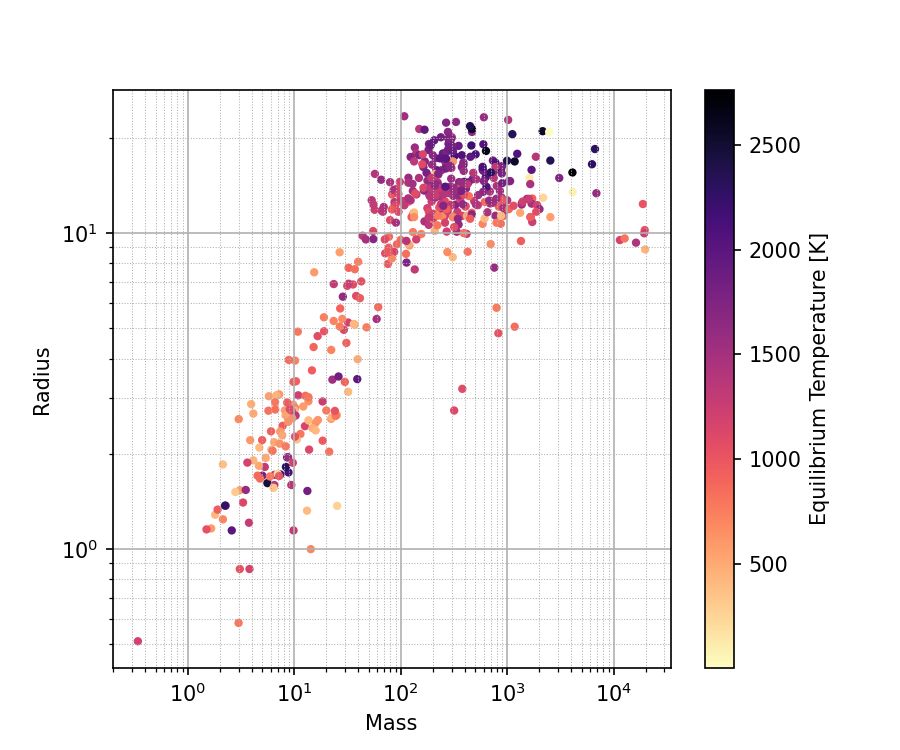

In [4]:
fig, ax = plt.subplots(figsize=(6,5),dpi=150)

c = ax.scatter(dataset['mass'],dataset['radius'], c=dataset['temp_eq'], cmap=cm.magma_r, marker='.', alpha=1)
plt.colorbar(c, label=r'Equilibrium Temperature [K]')

# ax.legend(fontsize=8, bbox_to_anchor=(1.2, 1), loc="upper left")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Mass')
ax.set_ylabel(r'Radius')

ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)

## Plot Radius vs Mass and Star Age

<IPython.core.display.Javascript object>


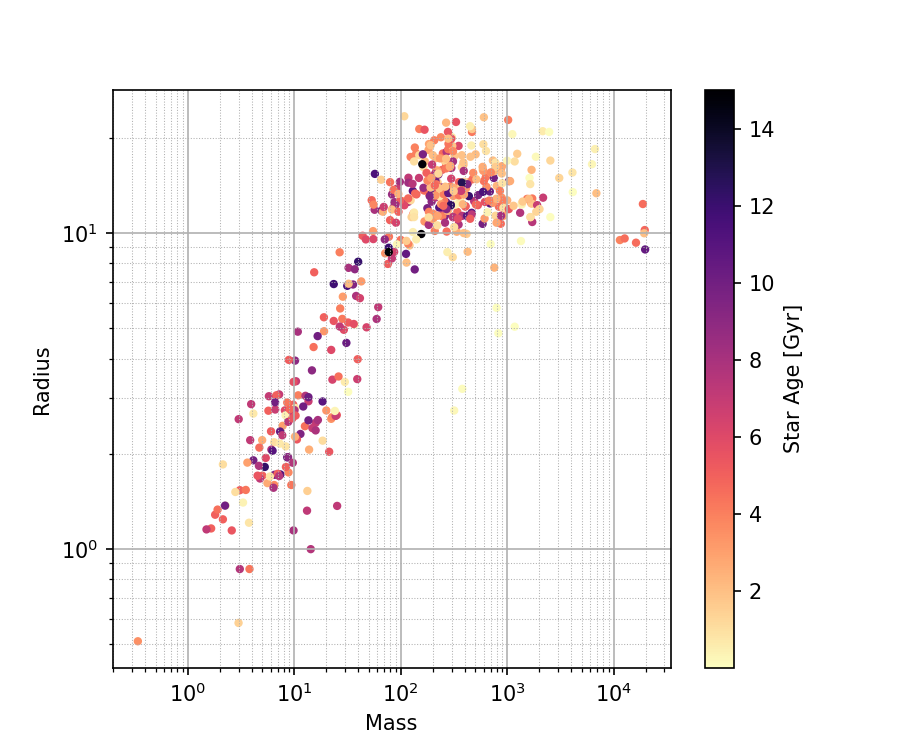

In [5]:
dataset['star_age'] = pd.to_numeric(dataset['star_age'], errors='coerce')


fig, ax = plt.subplots(figsize=(6,5),dpi=150)

c = ax.scatter(dataset['mass'],dataset['radius'], c=dataset['star_age'], cmap=cm.magma_r, marker='.', alpha=1)
plt.colorbar(c, label=r'Star Age [Gyr]')

# ax.legend(fontsize=8, bbox_to_anchor=(1.2, 1), loc="upper left")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Mass')
ax.set_ylabel(r'Radius')

ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)


## Load pickle file containing Theoretical and TTV mass detection planets

In [6]:
import pickle
#Read list to memory
def read_list(file_name):
    # for reading also binary mode is important
    with open(file_name, 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

In [10]:
mass_th = read_list('Theoretical_mass_pl.pkl')
mass_ttv = read_list('TTV_mass_pl.pkl')

<IPython.core.display.Javascript object>


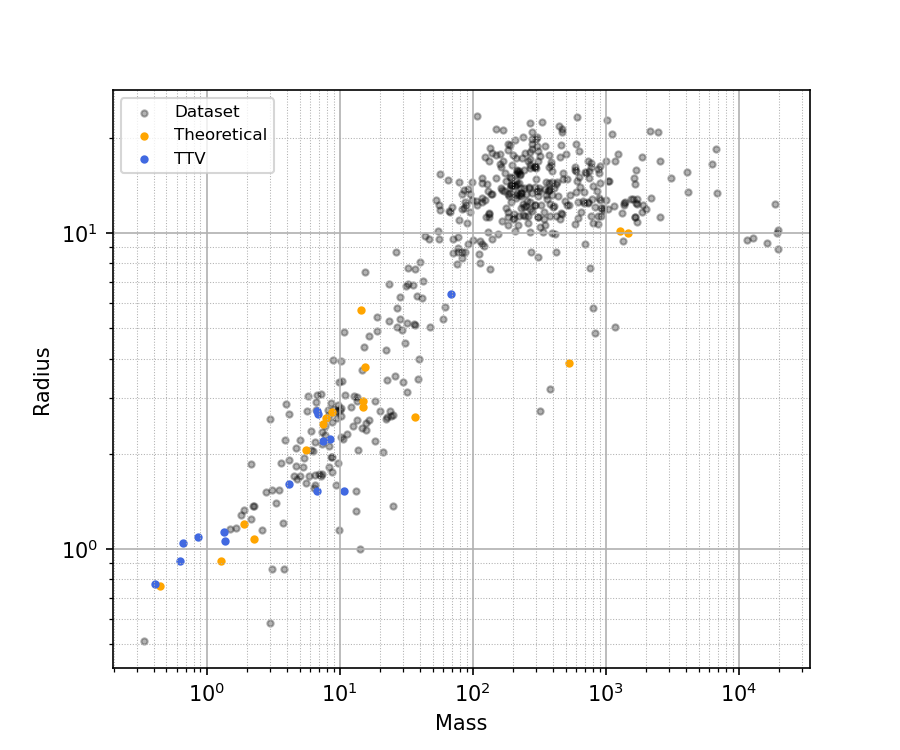

In [11]:
fig, ax = plt.subplots(figsize=(6,5),dpi=150)
ax.scatter(dataset.mass, dataset.radius, c='k', marker='.', alpha=.3, label='Dataset')
ax.scatter(mass_th.mass, mass_th.radius, c='orange', marker='.', alpha=1, label='Theoretical')
ax.scatter(mass_ttv.mass, mass_ttv.radius, c='royalblue', marker='.', alpha=1, label='TTV')
ax.legend(fontsize=8, loc="upper left")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mass')
ax.set_ylabel('Radius')
ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)
ax.minorticks_on()